In [31]:
from minisom import MiniSom    
from sklearn.cluster import KMeans
data = [[ 0.80,  0.55,  0.22,  0.03],
        [ 0.82,  0.50,  0.23,  0.03],
        [ 0.80,  0.54,  0.22,  0.03],
        [ 0.80,  0.53,  0.26,  0.03],
        [ 0.79,  0.56,  0.22,  0.03],
        [ 0.75,  0.60,  0.25,  0.03],
        [ 0.77,  0.59,  0.22,  0.03]]

data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
d1 = 10
d2 = 10
som = MiniSom(d1, d2, 4, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)

som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 1000, verbose=True)  # random training



#som = MiniSom(3, 3, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
#som.train_random(data, 100) # trains the SOM with 100 iterations
print(som.get_weights())
print('------')
rweights = som.get_weights().reshape(d1*d2,-1) # first argument is product of first two dimensions of the input dataset
kmeans = KMeans(n_clusters=3, random_state=0).fit(rweights)
labels = kmeans.labels_
print(labels)

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 3.7626585055239994e-05
 topographic error: 0.15333333333333332
[[[0.59215657 0.3109221  0.460077   0.2453202 ]
  [0.69638854 0.32140365 0.59221982 0.24631634]
  [0.69414734 0.30750574 0.60640934 0.2360642 ]
  [0.70521206 0.2870904  0.61090214 0.21395047]
  [0.7134514  0.25841275 0.6211795  0.19466365]
  [0.72062973 0.28475814 0.59583662 0.20749097]
  [0.72327363 0.32152402 0.56866948 0.22321557]
  [0.7270003  0.32548644 0.55430012 0.24056624]
  [0.74504345 0.3106943  0.55087605 0.20654854]
  [0.76769956 0.27545264 0.55048574 0.17688512]]

 [[0.68285267 0.33897606 0.59093722 0.26305948]
  [0.68450129 0.33453939 0.59964829 0.2439612 ]
  [0.69115067 0.32068778 0.60517181 0.23040857]
  [0.71054441 0.30085904 0.59953921 0.21085982]
  [0.72190412 0.27575971 0.60507993 0.19000192]
  [0.72963386 0.28882227 0.58143003 0.21381107]
  [0.72939264 0.31810266 0.5670324  0.21193528]
  [0.73849504 0.329065   0.55354412 0.19813156]


In [32]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


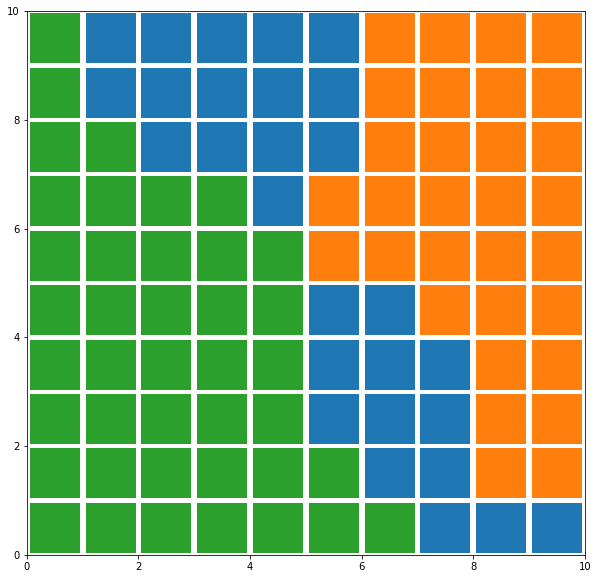

In [81]:

plt.figure(figsize=(d1, d2))
# Plotting the response for each pattern in the iris dataset
win_map = som.win_map(rweights)
#plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()
# use different colors and markers for each label
#markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for cnt, xx in enumerate(rweights):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, 's', markerfacecolor=colors[labels[cnt]],
             markeredgecolor=colors[labels[cnt]], markersize=48, markeredgewidth=2)
plt.axis([0, d1, 0, d2])
plt.show()
